In [1]:
import glymur
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b_f = "S2B_MSIL2A_20200527T095029_N0214_R079_T34UDC_20200527T123117.SAFE/GRANULE/L2A_T34UDC_A016836_20200527T095501/IMG_DATA/R10m/T34UDC_20200527T095029_B02_10m.jp2"
g_f = "S2B_MSIL2A_20200527T095029_N0214_R079_T34UDC_20200527T123117.SAFE/GRANULE/L2A_T34UDC_A016836_20200527T095501/IMG_DATA/R10m/T34UDC_20200527T095029_B03_10m.jp2"
r_f = "S2B_MSIL2A_20200527T095029_N0214_R079_T34UDC_20200527T123117.SAFE/GRANULE/L2A_T34UDC_A016836_20200527T095501/IMG_DATA/R10m/T34UDC_20200527T095029_B04_10m.jp2" 

b_jp2 = glymur.Jp2k(b_f)
g_jp2 = glymur.Jp2k(g_f)
r_jp2 = glymur.Jp2k(r_f)

b_r = b_jp2[:]/22.5;
b_g = g_jp2[:]/22.5;
b_b = r_jp2[:]/22.5;

In [3]:
RGB_gt = np.zeros([len(b_r), len(b_r[0]), 3], np.uint8)
RGB_gt[:, :, 0] = b_r;
RGB_gt[:, :, 1] = b_g;
RGB_gt[:, :, 2] = b_b;

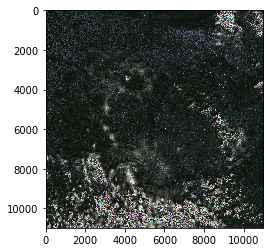

In [9]:
plt.imshow(RGB_gt)

In [10]:
#Pobranie wspolrzednych dzialki

In [4]:
from ipynb.fs.full.import_plot_cords import cord_reader
#import requests

In [83]:
lot_cords_tmp = cord_reader(["101507_2.0033.187"])

In [82]:
#PUWG => latitude-longtitude
import pyproj
def cord_convert(lot_puwg_cords, lot_id):
    
    input_proj = pyproj.Proj(init='epsg:2180')
    output_proj = pyproj.Proj(init="epsg:4326")
    
    cord_list = lot_puwg_cords.get(lot_id)
    for i in range(len(cord_list)):
        cord = str.split(cord_list[i]) 
        y = float(cord[0])
        x = float(cord[1])
        x_out, y_out = pyproj.transform(input_proj, output_proj, x, y)
        cord_list[i] = [x_out, y_out]
    
    #delete last coordinates, probaby duplicates first one
    lot_puwg_cords[lot_id] = cord_list[0:len(cord_list)-1]
    return lot_puwg_cords

In [84]:
lot_cords = cord_convert(lot_cords_tmp, "101507_2.0033.187")

/home/piotr/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/piotr/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/home/piotr/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When mak

In [85]:
lot_cords_matrix = lot_cords.get("101507_2.0033.187")

In [86]:
lot_cords_matrix

[[20.18609212323858, 51.8500806996221],
 [20.18664160370571, 51.85258457896293],
 [20.184470902645398, 51.85244275973735],
 [20.18396806301617, 51.850106595401456]]

In [167]:
#bounds
cords_max = np.max(lot_cords_matrix, axis = 0)
cords_min = np.min(lot_cords_matrix, axis = 0)

In [172]:
upper = cords_max[1]
bottom = cords_min[1]
left = cords_min[0]
right = cords_max[0]

In [173]:
right

20.18664160370571

In [ ]:
52.34134780285317 19.531528902588295 52.350386283733314 21.143290766756213 51.36315784303349 21.140188798644377 51.354432348394134 19.563305120541532 52.34134780285317 19.531528902588295

In [342]:
D = [19.531528902588295, 52.34134780285317]
C = [21.143290766756213, 52.350386283733314]
B = [21.140188798644377, 51.36315784303349]
A = [19.563305120541532, 51.354432348394134]
#Szukany
X = [20.185202, 51.851296]

In [296]:
D = [0.1, 4]
C = [3.9, 4]
B = [4, 0]
A = [0, 0]
#Szukany
X = [3, 3]

In [340]:
def slope_intercept(x1,y1,x2,y2):
    a = (y2 - y1) / (x2 - x1)
    b = y1 - a * x1     
    return a,b

import math
def dist(x, y):
   return math.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

In [344]:
def funkcja(A, B, C, D, X, photo):
    x_size = photo.shape[0]
    y_size = photo.shape[1]
    
    #prosta AB (oś OX)
    y_ab = slope_intercept(A[0],A[1],B[0],B[1])
    #prosta AD
    y_ad = slope_intercept(A[0],A[1],D[0],D[1])
    #prosta BC
    y_bc = slope_intercept(B[0],B[1],C[0],C[1])
    #prosta CD
    y_cd = slope_intercept(C[0],C[1],D[0],D[1])
    
    P = [(X[1] - y_ad[1])/y_ad[0], X[1]]
    Q = [(X[1] - y_bc[1])/y_bc[0], X[1]]
    
    p_x = dist(P, X)/dist(P, Q)
    
    R = [X[0], y_ab[0]*X[0]+y_ab[1]]
    W = [X[0], y_cd[0]*X[0]+y_cd[1]]
    
    r_x = dist(R, X)/dist(R, W)
    
    X_cord=x_size*(1-r_x)
    Y_cord=y_size*(p_x)

    return X_cord, Y_cord

In [332]:
P = [(X[1] - y_ad[1])/y_ad[0], X[1]]

In [333]:
Q = [(X[1] - y_bc[1])/y_bc[0], X[1]]

In [334]:
import math
def dist(x, y):
   return math.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

In [335]:
p_x = dist(P, X)/dist(P, Q)

In [336]:
R = [X[0], y_ab[0]*X[0]+y_ab[1]]
W = [X[0], y_cd[0]*X[0]+y_cd[1]]

In [337]:
r_x = dist(R, X)/dist(R, W)

In [338]:
r_x

0.4998505644821757

In [339]:
p_x

0.40008063136553806

In [345]:
funkcja(A, B, C, D, X, RGB_gt)

(5491.640801985711, 4392.885332393608)

In [346]:
[20.18396806301617, 51.850106595401456]
[20.18664160370571,51.85258457896293]

[20.18664160370571, 51.85258457896293]

In [348]:
funkcja(A, B, C, D, [20.18396806301617, 51.850106595401456], RGB_gt)

(5504.79414447153, 4384.239633771912)

In [350]:
funkcja(A, B, C, D, [20.18664160370571,51.85258457896293], RGB_gt)

(5477.39708506721, 4402.959180526659)

In [ ]:
# dół lewy 344737.526596, 323419.695718
import matplotlib.image as mpimg
# góra prawy 219596.039576, -40812.901907
import cv2
cropped = RGB_gt[5477:5504,4384:4402,:]

cv2.imwrite("to_norm.png", cropped)